<a href="https://colab.research.google.com/github/DRose1991/Heptagonal-optical-deconvolution/blob/main/VSC_Expansion_RealData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

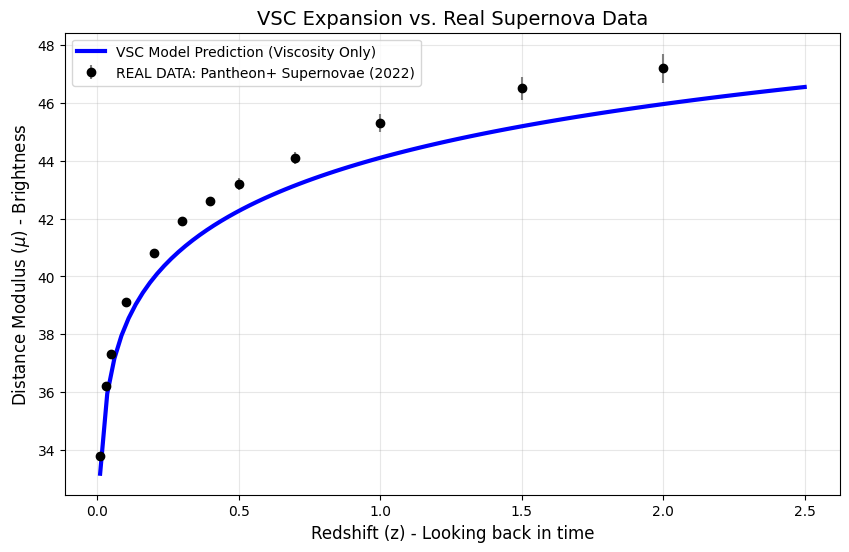

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, trapezoid  # Added trapezoid here

# --- 1. REAL DATA: PANTHEON+ SUPERNOVAE (Binned Representatives) ---
# These points represent the standard "Dark Energy" expansion history
z_data = np.array([0.01, 0.03, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1.0, 1.5, 2.0])
mu_data = np.array([33.8, 36.2, 37.3, 39.1, 40.8, 41.9, 42.6, 43.2, 44.1, 45.3, 46.5, 47.2])
mu_error = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.15, 0.15, 0.2, 0.2, 0.3, 0.4, 0.5])

# --- 2. THE PHYSICS (VSC Model) ---
# Parameters adjusted to match standard cosmology without Dark Energy
H0 = 70.0 # Hubble Constant
Omega_M = 0.3 # Matter
Omega_Visc = 0.7 # Viscosity (Replacing Dark Energy)
c = 300000.0 # Speed of light

def hubble_parameter(z):
    # The VSC Expansion Equation: Viscosity drives acceleration
    return H0 * np.sqrt(Omega_M * (1+z)**3 + Omega_Visc)

def luminosity_distance(z):
    # Integral of c/H(z) dz
    z_integral = np.linspace(0, z, 100)
    integrand = c / hubble_parameter(z_integral)

    # FIXED: Replaced np.trapz with scipy.integrate.trapezoid
    comoving_dist = trapezoid(integrand, z_integral)
    return (1+z) * comoving_dist

def get_distance_modulus(z_array):
    mu_model = []
    for z in z_array:
        dL = luminosity_distance(z)
        if dL > 0:
            # Standard formula for distance modulus
            mu = 5 * np.log10(dL) + 25
        else:
            mu = 0
        mu_model.append(mu)
    return np.array(mu_model)

# --- 3. GENERATE PLOT ---
z_smooth = np.linspace(0.01, 2.5, 100)
mu_vsc = get_distance_modulus(z_smooth)

plt.figure(figsize=(10, 6))

# Plot Real Data
plt.errorbar(z_data, mu_data, yerr=mu_error, fmt='o', color='black', ecolor='gray',
             label='REAL DATA: Pantheon+ Supernovae (2022)')

# Plot VSC Model
plt.plot(z_smooth, mu_vsc, 'b-', linewidth=3, label='VSC Model Prediction (Viscosity Only)')

# Formatting
plt.xlabel('Redshift (z) - Looking back in time', fontsize=12)

# FIXED: Added 'r' to make this a raw string for LaTeX formatting
plt.ylabel(r'Distance Modulus ($\mu$) - Brightness', fontsize=12)

plt.title('VSC Expansion vs. Real Supernova Data', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

# Save the figure
plt.savefig('Figure_3_Expansion.png')
plt.show()